In [5]:
import datetime as dt

import numpy as np
import pandas as pd
import seaborn as sns

import os
import re

In [6]:
file_path = "../data/budownictwo_mieszkaniowe_w_okresie_styczen-pazdziernik_2024_r._tabela_2.xls" 
os.path.isfile(file_path)


True

In [7]:
tdf = pd.read_excel(file_path)
tdf.to_csv("../data/temp_deweloperzy.csv")

In [8]:
df = pd.read_excel(file_path, header=1)
df = df.iloc[12:]
df = df.iloc[:-1]
df.head()

,Unnamed: 0,I,I-II,I-III,I-IV,I-V,I-VI,I-VII,I-VIII,I-IX,I-X,I-XI,I-XII
12,NaN,1993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,OGÓŁEM,8513,15456,22266,28231,34213,42060,49665,56195,62092,68618,76891,94449
14,indywidualne,1906,3724,5601,7427,9341,12931,14834,17080,19501,22334,25465,33463
15,sprzedaż lub wynajem,3,18,87,108,113,199,229,265,310,342,343,485
16,spółdzielcze,5634,10041,14169,17849,21327,24796,29403,33037,35895,39053,43326,50002


Możemy użyć metody `stepwise_selection` z pakietu _dmba_.

In [9]:
df.head()

,Unnamed: 0,I,I-II,I-III,I-IV,I-V,I-VI,I-VII,I-VIII,I-IX,I-X,I-XI,I-XII
12,NaN,1993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,OGÓŁEM,8513,15456,22266,28231,34213,42060,49665,56195,62092,68618,76891,94449
14,indywidualne,1906,3724,5601,7427,9341,12931,14834,17080,19501,22334,25465,33463
15,sprzedaż lub wynajem,3,18,87,108,113,199,229,265,310,342,343,485
16,spółdzielcze,5634,10041,14169,17849,21327,24796,29403,33037,35895,39053,43326,50002


In [10]:
df['year'] = None
df

,Unnamed: 0,I,I-II,I-III,I-IV,I-V,I-VI,I-VII,I-VIII,I-IX,I-X,I-XI,I-XII,year
12,NaN,1993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
13,OGÓŁEM,8513,15456,22266,28231,34213,42060,49665,56195,62092,68618,76891,94449,None
14,indywidualne,1906,3724,5601,7427,9341,12931,14834,17080,19501,22334,25465,33463,None
15,sprzedaż lub wynajem,3,18,87,108,113,199,229,265,310,342,343,485,None
16,spółdzielcze,5634,10041,14169,17849,21327,24796,29403,33037,35895,39053,43326,50002,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,OGÓŁEM,14909,31011,48286,64243,79164,95615,114244,128830,145411,162544,NaN,NaN,None
200,indywidualne,6165,12027,18087,24016,29257,34660,40870,46332,51631,57685,NaN,NaN,None
201,sprzedaż lub wynajem,8312,18232,29106,38768,48053,58662,70067,78514,89608,99938,NaN,NaN,None
202,spółdzielcze,36,36,56,119,180,300,840,840,841,1037,NaN,NaN,None


In [11]:
df.columns

Index(['Unnamed: 0', 'I', 'I-II', 'I-III', 'I-IV', 'I-V', 'I-VI', 'I-VII',
       'I-VIII', 'I-IX', 'I-X', 'I-XI', 'I-XII', 'year'],
      dtype='object')

In [ ]:
current_year = None
for index, row in df.iterrows():
    if np.isnan(row["I-II"]):
        current_year = row["I"]
    df.at[index, "year"] = current_year

df['year']

12     1993
13     1993
14     1993
15     1993
16     1993
       ... 
199    2024
200    2024
201    2024
202    2024
203    2024
Name: year, Length: 192, dtype: object

In [13]:
df["year"].unique()

array([1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, '2005 a', '2006a', '2007a', '2008a', '2009a', '2010a',
       '2011a', '2012a', '2013a', '2014a', '2015a', '2016a', '2017a',
       '2018a', 2019, 2020, 2021, 2022, 2023, 2024], dtype=object)

In [14]:
df['year'] = df['year'].apply(lambda r: int(re.findall(r"\d+", r)[0]) if isinstance(r, str) else r)
df["year"].unique()

array([1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024])

In [15]:
df = df[df["year"] >= 2014]
df = df[~df["Unnamed: 0"].isna()]
df.head(10)

,Unnamed: 0,I,I-II,I-III,I-IV,I-V,I-VI,I-VII,I-VIII,I-IX,I-X,I-XI,I-XII,year
139,OGÓŁEM,12511,24973,35562,47208,56101,66418,79677,88821,100142,114866,127871,143166,2014
140,indywidualne,7155,13869,20399,26501,32017,37819,44347,49365,55417,62064,67961,76129,2014
141,sprzedaż lub wynajem,4449,9517,13204,18299,21484,25601,31480,34515,39247,46408,52803,59065,2014
142,spółdzielcze,415,773,1012,1205,1251,1392,1873,2146,2544,2809,3117,3490,2014
143,pozostałe,492,814,947,1203,1349,1606,1977,2795,2934,3585,3990,4482,2014
145,OGÓŁEM,11748,21241,31703,42138,52548,63966,76852,88067,101331,116296,130032,147711,2015
146,indywidualne,6627,12930,19698,26470,32231,38542,45855,51751,57798,64434,71175,79758,2015
147,sprzedaż lub wynajem,4868,7818,11182,14493,19099,23896,28839,33606,40365,47902,54425,62420,2015
148,spółdzielcze,50,81,244,494,495,511,735,1075,1195,1381,1595,2115,2015
149,pozostałe,203,412,579,681,723,1017,1423,1635,1973,2579,2837,3418,2015


In [16]:
df.columns

Index(['Unnamed: 0', 'I', 'I-II', 'I-III', 'I-IV', 'I-V', 'I-VI', 'I-VII',
       'I-VIII', 'I-IX', 'I-X', 'I-XI', 'I-XII', 'year'],
      dtype='object')

In [17]:
df2014 = df[df["year"] == 2014].copy()
df2014


,Unnamed: 0,I,I-II,I-III,I-IV,I-V,I-VI,I-VII,I-VIII,I-IX,I-X,I-XI,I-XII,year
139,OGÓŁEM,12511,24973,35562,47208,56101,66418,79677,88821,100142,114866,127871,143166,2014
140,indywidualne,7155,13869,20399,26501,32017,37819,44347,49365,55417,62064,67961,76129,2014
141,sprzedaż lub wynajem,4449,9517,13204,18299,21484,25601,31480,34515,39247,46408,52803,59065,2014
142,spółdzielcze,415,773,1012,1205,1251,1392,1873,2146,2544,2809,3117,3490,2014
143,pozostałe,492,814,947,1203,1349,1606,1977,2795,2934,3585,3990,4482,2014


In [18]:
def from_roman(num):
    roman_numerals = {'I':1, 'V':5, 'X':10, 'L':50, 'C':100, 'D':500, 'M':1000}
    result = 0
    for i,c in enumerate(num):
        if (i+1) == len(num) or roman_numerals[c] >= roman_numerals[num[i+1]]:
            result += roman_numerals[c]
        else:
            result -= roman_numerals[c]
    return result

def rename_columns(col_name: str) -> str:
    if col_name == "Unnamed: 0":
        return "title"
    elif col_name == "I":
        return "1"
    elif col_name[:2] == "I-":
        return str(from_roman(col_name[2:]))
    else:
        return col_name
    

df.rename(columns=rename_columns, inplace=True)
df.head()

,title,1,2,3,4,5,6,7,8,9,10,11,12,year
139,OGÓŁEM,12511,24973,35562,47208,56101,66418,79677,88821,100142,114866,127871,143166,2014
140,indywidualne,7155,13869,20399,26501,32017,37819,44347,49365,55417,62064,67961,76129,2014
141,sprzedaż lub wynajem,4449,9517,13204,18299,21484,25601,31480,34515,39247,46408,52803,59065,2014
142,spółdzielcze,415,773,1012,1205,1251,1392,1873,2146,2544,2809,3117,3490,2014
143,pozostałe,492,814,947,1203,1349,1606,1977,2795,2934,3585,3990,4482,2014


In [19]:
def proceed_subdf(df: pd.DataFrame, year: int) -> pd.DataFrame:
    ndf = df.T
    ndf.columns = ndf.iloc[0]
    ndf.drop(index="title", inplace=True)
    ndf.drop(index="year", inplace=True)
    for index in range(12, 1, -1):
        ndf.loc[str(index)] -= ndf.loc[str(index-1)]
    ndf.index = [dt.datetime(year=year, month=int(ind), day=1) for ind in ndf.index]
    return ndf

proceed_subdf(df=df2014, year=2014)

KeyError: "['title'] not found in axis"

In [91]:
dfs = []
for year, _df in df.groupby(by="year"):
    dfs.append(proceed_subdf(df=_df, year=year))
len(dfs)

11

In [96]:
tdf = pd.concat(objs=dfs, axis=0)
tdf.head()

title,OGÓŁEM,indywidualne,sprzedaż lub wynajem,spółdzielcze,pozostałe
2014-01-01,12511,7155,4449,415,492
2014-02-01,12462,6714,5068,358,322
2014-03-01,10589,6530,3687,239,133
2014-04-01,11646,6102,5095,193,256
2014-05-01,8893,5516,3185,46,146


In [100]:
tdf.columns

Index(['ogolem', 'indywidualne', 'sprzedaz_lub_wynajem', 'spoldzielcze',
       'pozostale'],
      dtype='object', name='title')

In [101]:
tdf.rename(columns={
    'OGÓŁEM':"ogolem",
    'indywidualne':"indywidualne",
    'sprzedaż lub wynajem': "sprzedaz_lub_wynajem",
    'spółdzielcze': "spoldzielcze",
       'pozostałe': "pozostale"},
       inplace=True)
tdf.index.name = "data"
tdf.head()

title,ogolem,indywidualne,sprzedaz_lub_wynajem,spoldzielcze,pozostale
data,,,,,
2014-01-01,12511,7155,4449,415,492
2014-02-01,12462,6714,5068,358,322
2014-03-01,10589,6530,3687,239,133
2014-04-01,11646,6102,5095,193,256
2014-05-01,8893,5516,3185,46,146


In [105]:
tdf.index

DatetimeIndex(['2014-01-01', '2014-02-01', '2014-03-01', '2014-04-01',
               '2014-05-01', '2014-06-01', '2014-07-01', '2014-08-01',
               '2014-09-01', '2014-10-01',
               ...
               '2024-03-01', '2024-04-01', '2024-05-01', '2024-06-01',
               '2024-07-01', '2024-08-01', '2024-09-01', '2024-10-01',
               '2024-11-01', '2024-12-01'],
              dtype='datetime64[ns]', name='data', length=132, freq=None)

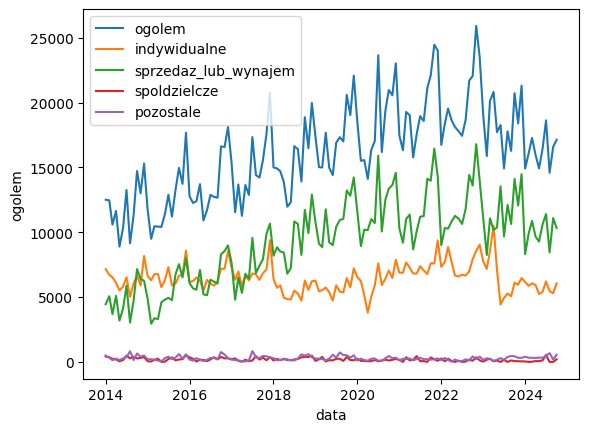

In [111]:

for col in tdf.columns:
    sns.lineplot(x='data', y=col, data=tdf, label=col)

In [112]:
tdf.to_csv("../data/gus_budowa.csv")

In [62]:
df2014

,title,1,2,3,4,5,6,7,8,9,10,11,12,year
139,OGÓŁEM,12511,24973,35562,47208,56101,66418,79677,88821,100142,114866,127871,143166,2014
140,indywidualne,7155,13869,20399,26501,32017,37819,44347,49365,55417,62064,67961,76129,2014
141,sprzedaż lub wynajem,4449,9517,13204,18299,21484,25601,31480,34515,39247,46408,52803,59065,2014
142,spółdzielcze,415,773,1012,1205,1251,1392,1873,2146,2544,2809,3117,3490,2014
143,pozostałe,492,814,947,1203,1349,1606,1977,2795,2934,3585,3990,4482,2014


Unnamed: 0 Un named: 0
I I 
I-II I- II
I-III I- III
I-IV I- IV
I-V I- V
I-VI I- VI
I-VII I- VII
I-VIII I- VIII
I-IX I- IX
I-X I- X
I-XI I- XI
I-XII I- XII
year ye ar


,title,1,2,3,4,5,6,7,8,9,10,11,12,year
139,OGÓŁEM,12511,24973,35562,47208,56101,66418,79677,88821,100142,114866,127871,143166,2014
140,indywidualne,7155,13869,20399,26501,32017,37819,44347,49365,55417,62064,67961,76129,2014
141,sprzedaż lub wynajem,4449,9517,13204,18299,21484,25601,31480,34515,39247,46408,52803,59065,2014
142,spółdzielcze,415,773,1012,1205,1251,1392,1873,2146,2544,2809,3117,3490,2014
143,pozostałe,492,814,947,1203,1349,1606,1977,2795,2934,3585,3990,4482,2014


In [87]:
def proceed_subdf(df: pd.DataFrame, year: int) -> pd.DataFrame:
    ndf = df.T
    ndf.columns = ndf.iloc[0]
    ndf.drop(index="title", inplace=True)
    ndf.drop(index="year", inplace=True)
    for index in range(12, 1, -1):
        ndf.loc[str(index)] -= ndf.loc[str(index-1)]
    ndf.index = [dt.datetime(year=year, month=int(ind), day=1) for ind in ndf.index]
    return ndf

proceed_subdf(df=df2014, year=2014)


title,OGÓŁEM,indywidualne,sprzedaż lub wynajem,spółdzielcze,pozostałe
2014-01-01,12511,7155,4449,415,492
2014-02-01,12462,6714,5068,358,322
2014-03-01,10589,6530,3687,239,133
2014-04-01,11646,6102,5095,193,256
2014-05-01,8893,5516,3185,46,146
2014-06-01,10317,5802,4117,141,257
2014-07-01,13259,6528,5879,481,371
2014-08-01,9144,5018,3035,273,818
2014-09-01,11321,6052,4732,398,139
2014-10-01,14724,6647,7161,265,651


In [80]:
ndf2014 = df2014.T
ndf2014.columns = ndf2014.iloc[0]
ndf2014.drop(index="title", inplace=True)
ndf2014.drop(index="year", inplace=True)
ndf2014

title,OGÓŁEM,indywidualne,sprzedaż lub wynajem,spółdzielcze,pozostałe
1,12511,7155,4449,415,492
2,24973,13869,9517,773,814
3,35562,20399,13204,1012,947
4,47208,26501,18299,1205,1203
5,56101,32017,21484,1251,1349
6,66418,37819,25601,1392,1606
7,79677,44347,31480,1873,1977
8,88821,49365,34515,2146,2795
9,100142,55417,39247,2544,2934
10,114866,62064,46408,2809,3585


In [81]:
ndf2014.index

Index(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12'], dtype='object')

In [82]:
for index in range(12, 1, -1):
    ndf2014.loc[str(index)] -= ndf2014.loc[str(index-1)]
ndf2014


title,OGÓŁEM,indywidualne,sprzedaż lub wynajem,spółdzielcze,pozostałe
1,12511,7155,4449,415,492
2,12462,6714,5068,358,322
3,10589,6530,3687,239,133
4,11646,6102,5095,193,256
5,8893,5516,3185,46,146
6,10317,5802,4117,141,257
7,13259,6528,5879,481,371
8,9144,5018,3035,273,818
9,11321,6052,4732,398,139
10,14724,6647,7161,265,651


In [85]:
ndf2014.index = [dt.datetime(year=2014, month=int(ind), day=1) for ind in ndf2014.index]
ndf2014

title,OGÓŁEM,indywidualne,sprzedaż lub wynajem,spółdzielcze,pozostałe
2014-01-01,12511,7155,4449,415,492
2014-02-01,12462,6714,5068,358,322
2014-03-01,10589,6530,3687,239,133
2014-04-01,11646,6102,5095,193,256
2014-05-01,8893,5516,3185,46,146
2014-06-01,10317,5802,4117,141,257
2014-07-01,13259,6528,5879,481,371
2014-08-01,9144,5018,3035,273,818
2014-09-01,11321,6052,4732,398,139
2014-10-01,14724,6647,7161,265,651
